In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, 
                                  n_features=2,
                                  n_informative=2,
                                  n_redundant=0,
                                  n_repeated=0, 
                                  n_classes=2, 
                                  random_state=0)


data = data - data.mean(axis=0)
data = pd.DataFrame(data, columns=['f1', 'f2'])
data['label'] = label

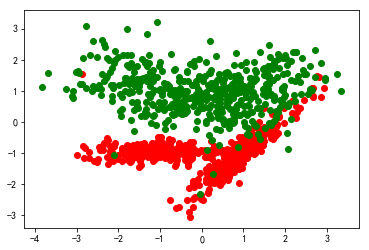

In [26]:
x = data.query('label == 0')
x, y = x['f1'].values, x['f2'].values
plt.scatter(x=x, y=y, color='r')
x = data.query('label == 1')
x, y = x['f1'].values, x['f2'].values
plt.scatter(x=x, y=y, color='g')
plt.show()

In [27]:
# 去均值
data['f1'] = data['f1'] - np.mean(data['f1'])
data['f2'] = data['f2'] - np.mean(data['f2'])
# 求协方差矩阵
cov = np.cov(data[['f1', 'f2']].T)
# 协方差矩阵的特征值与特征向量
eig_value, eig_vec = np.linalg.eig(cov)
# 求特征值最大对应的特征向量
v_ = eig_vec[:, np.where(eig_value == np.max(eig_value))[0]]
# 降维
data['pca_rst'] = np.dot(data[['f1', 'f2']], v_)

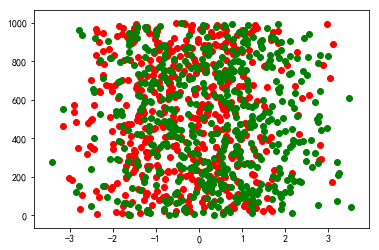

In [30]:
# 绘制降维后结果
x = data.query('label == 0')
x, y = x['pca_rst'].values, x.index.values
plt.scatter(x=x, y=y, color='r')
x = data.query('label == 1')
x, y = x['pca_rst'].values, x.index.values
plt.scatter(x=x, y=y, color='g')
plt.show()

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1 ,random_state=0)
data['sk_pca'] = pca.fit_transform(X=data[['f1', 'f2']])

In [49]:
data[['pca_rst', 'sk_pca']]

,pca_rst,sk_pca
0,-1.613505,-1.613505
1,0.339881,0.339881
2,-0.691761,-0.691761
3,-1.640072,-1.640072
4,-0.123358,-0.123358
5,-0.551312,-0.551312
6,-2.373123,-2.373123
7,0.554220,0.554220
8,-1.651661,-1.651661
9,-1.789900,-1.789900


In [21]:
data = pd.read_csv('./data/data.csv')
data = data - data.mean()
cov_matrix = np.cov(data.T)
eig_value, eig_vec = np.linalg.eig(cov_matrix)
v_ = eig_vec[:, np.where(eig_value == np.max(eig_value))[0]]
v_
np.dot(data.values, v_)

array([[-0.40200434],
       [ 1.78596968],
       [ 0.29427599],
       [-0.89923557],
       [-1.04573848],
       [ 0.5295593 ],
       [-0.96731071],
       [-1.11381362],
       [ 1.85922114],
       [-0.04092339]])

In [22]:
import numpy as np
x = np.mat([[ 0.9, 2.4, 1.2, 0.5, 0.3, 1.8, 0.5, 0.3, 2.5, 1.3],
            [ 1, 2.6, 1.7, 0.7, 0.7, 1.4, 0.6, 0.6, 2.6, 1.1]])
x = x.T
T = x - x.mean(axis=0)
C = np.cov(x.T)
w,v = np.linalg.eig(C)
v_ = np.mat(v[:,0]) #每个特征值对应的是特征矩阵的每个列向量
v_ = v_.T       #默认以行向量保存，转换成公式中的列向量形式
y = T * v_
print(y)

[[-0.40200434]
 [ 1.78596968]
 [ 0.29427599]
 [-0.89923557]
 [-1.04573848]
 [ 0.5295593 ]
 [-0.96731071]
 [-1.11381362]
 [ 1.85922114]
 [-0.04092339]]
